In [1]:
import numpy as np 
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
data=pd.read_csv("C://Users/Rajnish/Downloads/archive (18)/insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
for column in data.columns:
    print(data[column].value_counts())
    print('*'*20)

18    69
19    68
51    29
45    29
46    29
47    29
48    29
50    29
52    29
20    29
26    28
54    28
53    28
25    28
24    28
49    28
23    28
22    28
21    28
27    28
28    28
31    27
29    27
30    27
41    27
43    27
44    27
40    27
42    27
57    26
34    26
33    26
32    26
56    26
55    26
59    25
58    25
39    25
38    25
35    25
36    25
37    25
63    23
60    23
61    23
62    23
64    22
Name: age, dtype: int64
********************
male      676
female    662
Name: sex, dtype: int64
********************
32.300    13
28.310     9
31.350     8
30.800     8
30.875     8
          ..
20.100     1
29.545     1
37.900     1
25.520     1
24.090     1
Name: bmi, Length: 548, dtype: int64
********************
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64
********************
no     1064
yes     274
Name: smoker, dtype: int64
********************
southeast    364
northwest    325
southwest    325
northeast    324
Name: region, 

In [5]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
data['sex']=le.fit_transform(data['sex'])
data['smoker']=le.fit_transform(data['smoker'])
data['region']=le.fit_transform(data['region'])

In [7]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [8]:
x=data.drop('charges',axis=1)
y=data['charges']

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

<ipython-input-10-14d4bd4c6769>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  data.hist(ax=ax)


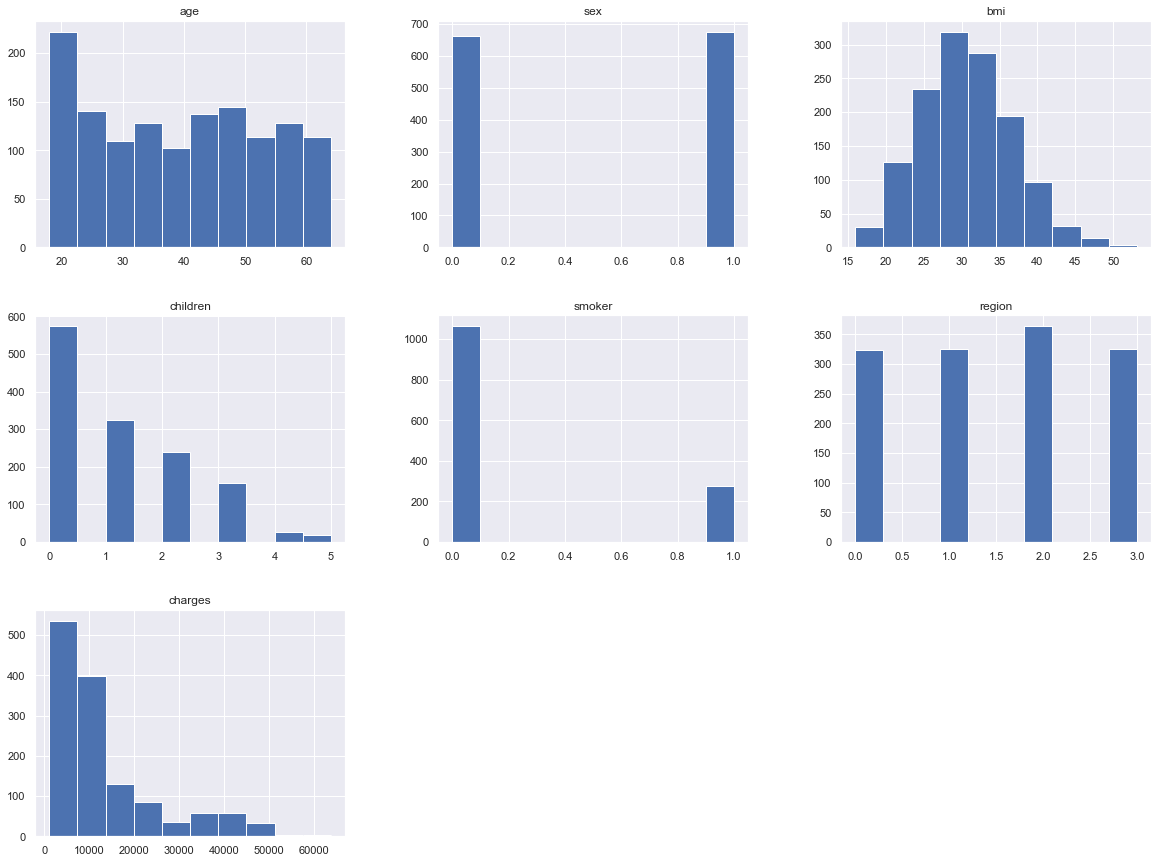

In [10]:
fig=plt.figure(figsize=(20,15))
ax=fig.gca()
data.hist(ax=ax)
plt.show();

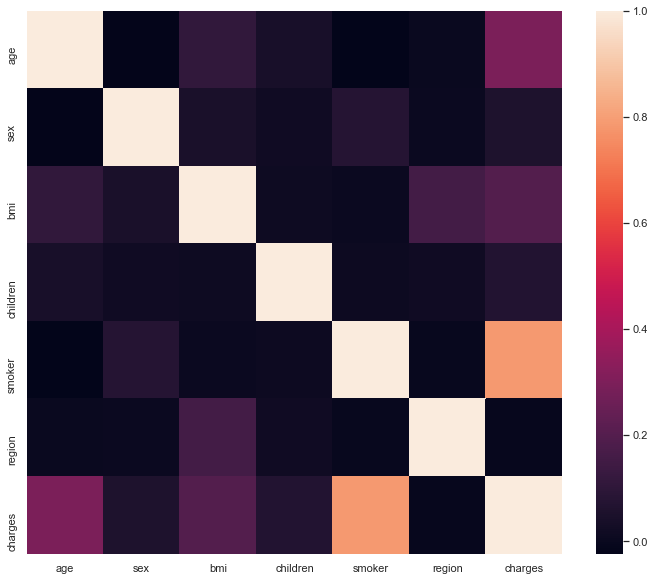

In [11]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr())
plt.show()

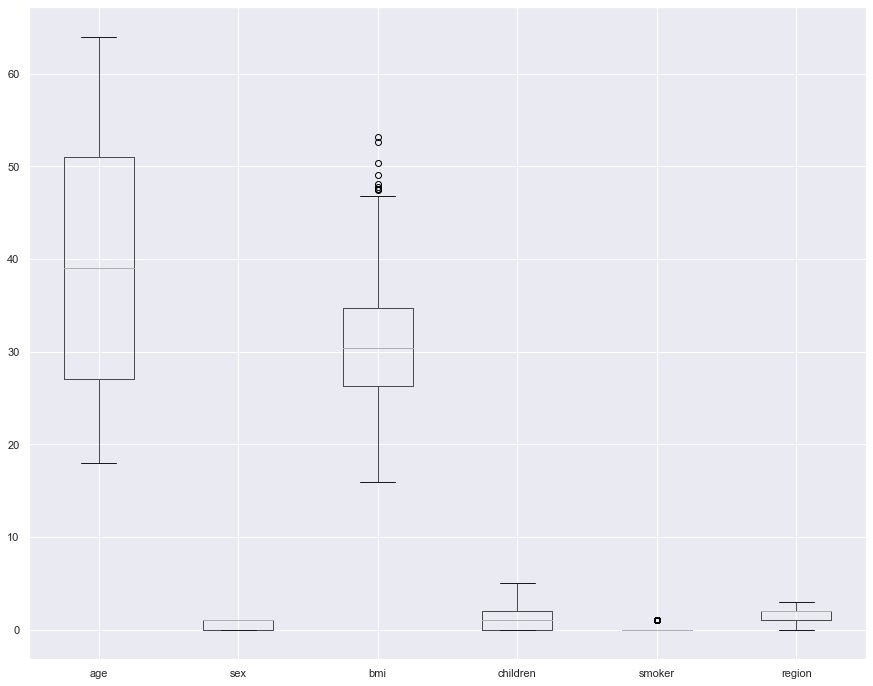

In [12]:
boxplot=x.boxplot(figsize=(15,12))

In [13]:
data.loc[data['bmi']>45]

,age,sex,bmi,children,smoker,region,charges
116,58,1,49.06,0,0,2,11381.32540
286,46,0,48.07,2,0,0,9432.92530
292,25,1,45.54,2,1,2,42112.23560
401,47,1,47.52,1,0,2,8083.91980
438,52,0,46.75,5,0,2,12592.53450
454,32,1,46.53,2,0,2,4686.38870
543,54,0,47.41,0,1,2,63770.42801
547,54,0,46.70,2,0,3,11538.42100
549,43,0,46.20,0,1,2,45863.20500
582,39,1,45.43,2,0,2,6356.27070


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
model_1=make_pipeline(StandardScaler(),LinearRegression())
model_1.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [15]:
model_1.score(x_test,y_test)

0.7602640802497018

In [16]:
y_pred=model_1.predict(x_test)
mean_absolute_error(y_test,y_pred)

4204.415654724194

# Lasso

In [17]:
from sklearn.linear_model import Lasso
model_2=make_pipeline(StandardScaler(),Lasso())
model_2.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [18]:
model_2.score(x_test,y_test)


0.7602651904580856

In [19]:
y_pred=model_2.predict(x_test)
mean_absolute_error(y_test,y_pred)

4204.260373504684

# RandomForestRegressor

In [20]:
from sklearn.ensemble import RandomForestRegressor
model_3=make_pipeline(StandardScaler(),RandomForestRegressor())
model_3.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())])

In [21]:
model_3.score(x_test,y_test)

0.8440145888542882

In [22]:
y_pred=model_3.predict(x_test)
mean_absolute_error(y_test,y_pred)

2620.9031907319013

# RandomForestRegression score=84.40%
# Lasso Score=76.02%
# Linear Regression=76.02%

randomforestregression score accuracy more then linearRegression and lasso 